In [188]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from utils import read_data
import seaborn as sns
import pandas as pd

In [189]:
params = {
    "p8bad": {"mode": "TEST", "modelName": "p8", "folderName": "2024-01-05-13-40-16"},
    "p8good": {"mode": "TEST", "modelName": "p8", "folderName": "2024-01-05-13-39-53"},
    "p16bad": {"mode": "TEST", "modelName": "p16", "folderName": "2024-01-05-13-31-06"},
    "p16good": {"mode": "TEST", "modelName": "p16", "folderName": "2024-01-05-13-29-37"},
    "m32bad": {"mode": "TEST", "modelName": "m32", "folderName": "2024-01-05-13-35-16"},
    "m32good": {"mode": "TEST", "modelName": "m32", "folderName": "2024-01-05-13-35-02"},
}

# param = "p8bad"
# param = "p8good"
# param = "p16bad"
# param = "p16good"
# param = "m32bad"
param = "m32good"

In [190]:
modelName = params[param]["modelName"]
mode = params[param]["mode"]
folderName = params[param]["folderName"]

In [191]:
if mode == "TRAIN":
    sourceFolder = "o7_analyze_train"
elif mode == "TEST":
    sourceFolder = "o7_analyze_test"
else:
    raise ValueError("Unknown mode")
sourceFolder = os.path.join(sourceFolder, modelName)

In [192]:
cwd = sys.path[0]
outputFolderPath = os.path.join(cwd, sourceFolder)
folderPath = os.path.join(outputFolderPath, folderName)
data_pickle, data_json = read_data(folderPath)

print(data_json["s7"])
X_pred = data_pickle["X_pred"]
X_true = data_pickle["X_true"]
tArrayPred = data_pickle["tArrayPred"]
mseArray = data_pickle["mseArray"]
dx = data_json["s2"]["dx"]
L = data_json["s2"]["L"]

{'mse': 0.0007437886379837291, 'mape': 0.021468612370667224, 'mode': 'TEST', 'modelName': 'm32', 'folderName': '2024-01-05-12-55-41', 'sourceFolder': 'o6_ml_test/m32'}


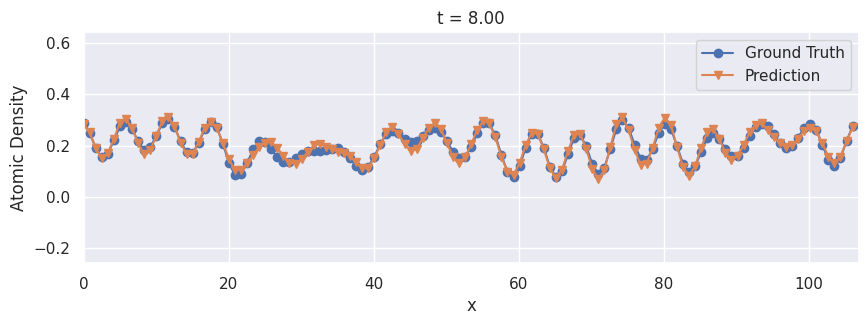

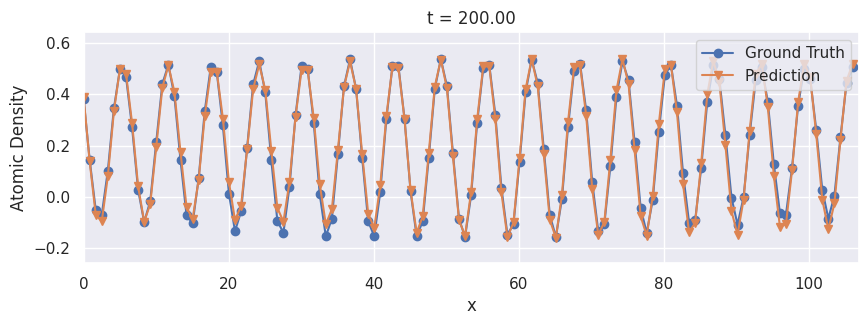

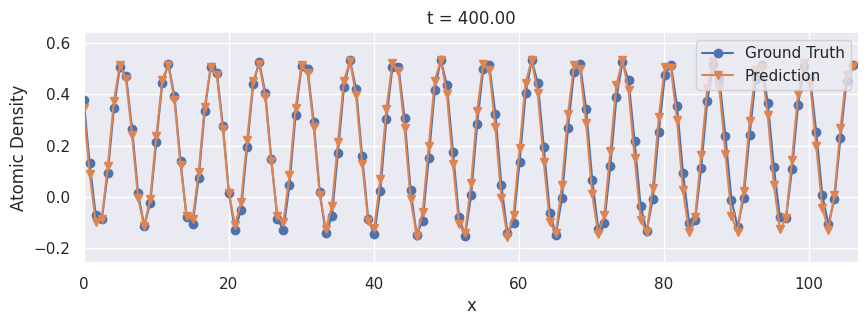

In [193]:
sns.set_theme()
filenamePrefix = "phi-compared"

minV = X_true[-1, :].min()
maxV = X_true[-1, :].max()
minV = minV - abs(maxV) * 0.2
maxV = maxV + abs(maxV) * 0.2
xp = np.arange(0, L, dx)

markerTypes = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

nFig = 3
idxTSample = np.floor(np.linspace(1, tArrayPred.shape[0] - 1, nFig)).astype(int)
for idx, t in enumerate(idxTSample):
    fig, ax = plt.subplots(figsize=(10, 3))
    tTime = tArrayPred[t]
    ax.plot(xp, X_true[t, :], marker='o', label=f"Ground Truth")
    ax.plot(xp, X_pred[t, :], marker='v', label=f"Prediction")
    ax.set_title(f"t = {tTime:.2f}")
    ax.set_ylim([minV, maxV])
    ax.set_xlabel("x")
    ax.set_ylabel("Atomic Density")
    ax.set_xlim([0, L])
    plt.legend(loc='upper right')
    tTimeFmt = f'{tTime:2.1f}'.replace(".","_")
    filename = f'{filenamePrefix}-{param}-{modelName}-t{tTimeFmt}.png'
    filePath = os.path.join(os.getcwd(), 'o8_visualize', filename)
    plt.savefig(filePath, dpi=300, bbox_inches="tight")